In [30]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn import model_selection
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import linear_model

In [2]:
data = joblib.load('final_etsy_data.pkl')

In [3]:
price = joblib.load('final_etsy_price.pkl')
views = joblib.load('final_etsy_views.pkl')
vectorized_features = joblib.load('final_etsy_vectorized_features.pkl')

Explore original data without eliminating any prices (does not correct for outliers)

In [4]:
standard_scaler = StandardScaler().fit(price.reshape(-1,1))
robust_scaler = RobustScaler().fit(price.reshape(-1,1))
power_transformer = PowerTransformer().fit(price.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))

In [5]:
price = np.array(price)
log_price = np.log1p(price)
standard_price = standard_scaler.transform(price.reshape(-1,1))
robust_price = robust_scaler.transform(price.reshape(-1,1))
power_price = power_transformer.transform(price.reshape(-1,1))
quantile_price = quantile_transformer.transform(price.reshape(-1,1))

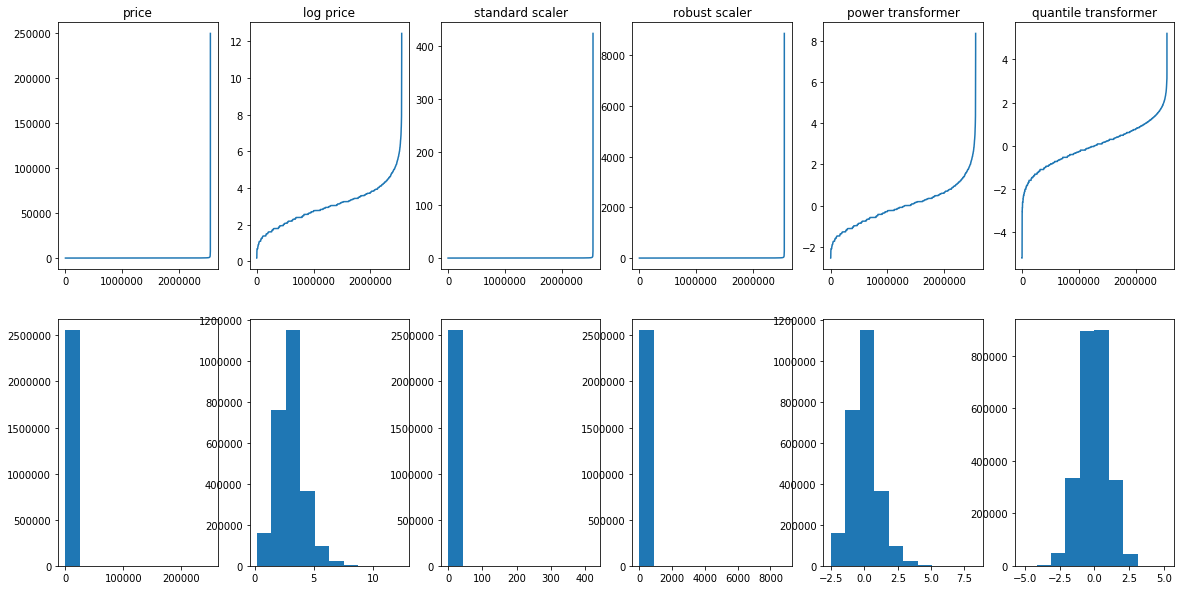

In [6]:
fig, ((ax0, ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(nrows=2, ncols=6, figsize = (20,10))

ax0.plot(sorted(price))
ax0.set_title('price')

ax6.hist(price)

ax1.plot(sorted(log_price))
ax1.set_title('log price')

ax7.hist(log_price)

ax2.plot(sorted(standard_price))
ax2.set_title('standard scaler')

ax8.hist(standard_price)

ax3.plot(sorted(robust_price))
ax3.set_title('robust scaler')

ax9.hist(robust_price)

ax4.plot(sorted(power_price))
ax4.set_title('power transformer')

ax10.hist(power_price)

ax5.plot(sorted(quantile_price))
ax5.set_title('quantile transformer')

ax11.hist(quantile_price)

plt.show()

In [7]:
print("Length of original dataset:", len(data))

Length of original dataset: 2552460


Only look at data with prices less than $1000

In [8]:
reduced_data = data[data['price'] < 1000]

In [9]:
price = np.array(reduced_data['price'].tolist())
standard_scaler = StandardScaler().fit(price.reshape(-1,1))
robust_scaler = RobustScaler().fit(price.reshape(-1,1))
power_transformer = PowerTransformer().fit(price.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))
log_price = np.log1p(price)
standard_price = standard_scaler.transform(price.reshape(-1,1))
robust_price = robust_scaler.transform(price.reshape(-1,1))
power_price = power_transformer.transform(price.reshape(-1,1))
quantile_price = quantile_transformer.transform(price.reshape(-1,1))

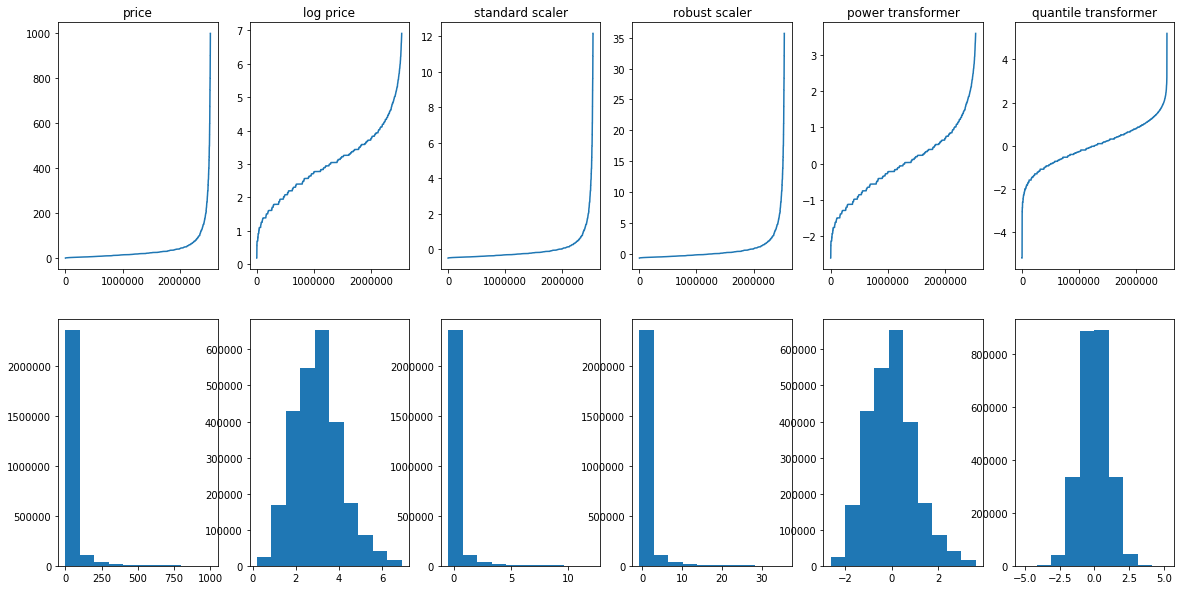

In [10]:
fig, ((ax0, ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(nrows=2, ncols=6, figsize = (20,10))

ax0.plot(sorted(price))
ax0.set_title('price')

ax6.hist(price)

ax1.plot(sorted(log_price))
ax1.set_title('log price')

ax7.hist(log_price)

ax2.plot(sorted(standard_price))
ax2.set_title('standard scaler')

ax8.hist(standard_price)

ax3.plot(sorted(robust_price))
ax3.set_title('robust scaler')

ax9.hist(robust_price)

ax4.plot(sorted(power_price))
ax4.set_title('power transformer')

ax10.hist(power_price)

ax5.plot(sorted(quantile_price))
ax5.set_title('quantile transformer')

ax11.hist(quantile_price)

plt.show()

In [11]:
print("Length of original dataset:", len(data))
print("Length of dataset with reduced price:", len(reduced_data))
print("Number of samples removed:", len(data)-len(reduced_data))
print("Percent of original dataset removed: ", (len(data)-len(reduced_data))/len(data)*100)

Length of original dataset: 2552460
Length of dataset with reduced price: 2539914
Number of samples removed: 12546
Percent of original dataset removed:  0.4915258221480454


Only look at data with prices less than $500

In [12]:
reduced_data = data[data['price'] < 500]

In [13]:
price = np.array(reduced_data['price'].tolist())
standard_scaler = StandardScaler().fit(price.reshape(-1,1))
robust_scaler = RobustScaler().fit(price.reshape(-1,1))
power_transformer = PowerTransformer().fit(price.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))
log_price = np.log1p(price)
standard_price = standard_scaler.transform(price.reshape(-1,1))
robust_price = robust_scaler.transform(price.reshape(-1,1))
power_price = power_transformer.transform(price.reshape(-1,1))
quantile_price = quantile_transformer.transform(price.reshape(-1,1))

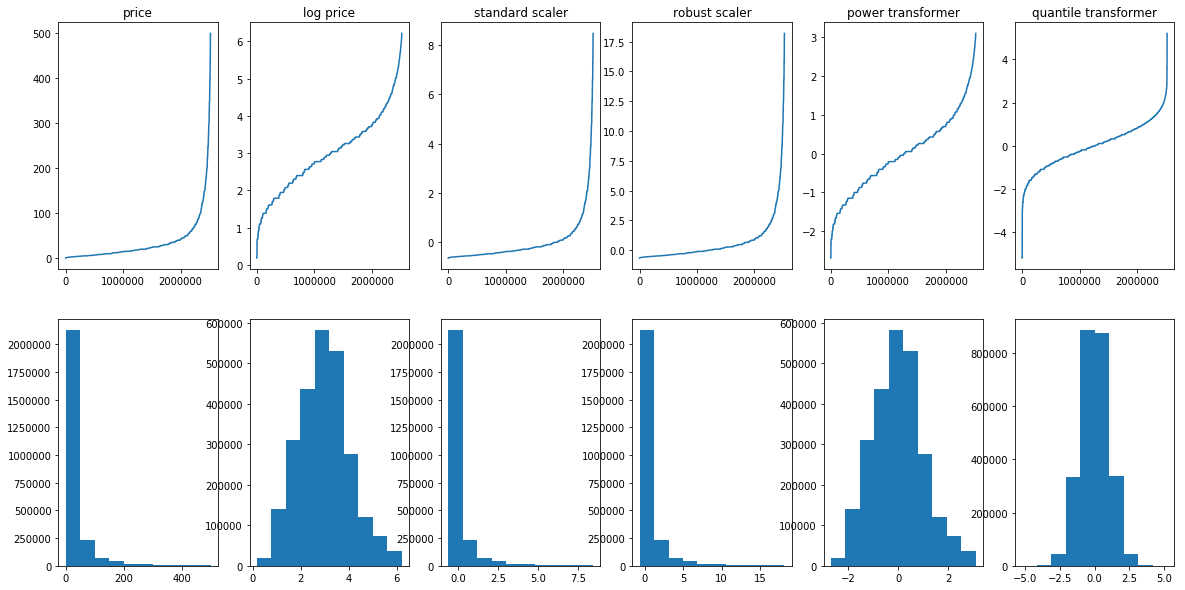

In [14]:
fig, ((ax0, ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(nrows=2, ncols=6, figsize = (20,10))

ax0.plot(sorted(price))
ax0.set_title('price')

ax6.hist(price)

ax1.plot(sorted(log_price))
ax1.set_title('log price')

ax7.hist(log_price)

ax2.plot(sorted(standard_price))
ax2.set_title('standard scaler')

ax8.hist(standard_price)

ax3.plot(sorted(robust_price))
ax3.set_title('robust scaler')

ax9.hist(robust_price)

ax4.plot(sorted(power_price))
ax4.set_title('power transformer')

ax10.hist(power_price)

ax5.plot(sorted(quantile_price))
ax5.set_title('quantile transformer')

ax11.hist(quantile_price)

plt.show()

In [15]:
print("Length of original dataset:", len(data))
print("Length of dataset with reduced price:", len(reduced_data))
print("Number of samples removed:", len(data)-len(reduced_data))
print("Percent of original dataset removed: ", (len(data)-len(reduced_data))/len(data)*100)

Length of original dataset: 2552460
Length of dataset with reduced price: 2522111
Number of samples removed: 30349
Percent of original dataset removed:  1.1890098179795179


Only look at data with prices less than $250

In [16]:
reduced_data = data[data['price'] < 250]

In [17]:
price = np.array(reduced_data['price'].tolist())
standard_scaler = StandardScaler().fit(price.reshape(-1,1))
robust_scaler = RobustScaler().fit(price.reshape(-1,1))
power_transformer = PowerTransformer().fit(price.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))
log_price = np.log1p(price)
standard_price = standard_scaler.transform(price.reshape(-1,1))
robust_price = robust_scaler.transform(price.reshape(-1,1))
power_price = power_transformer.transform(price.reshape(-1,1))
quantile_price = quantile_transformer.transform(price.reshape(-1,1))

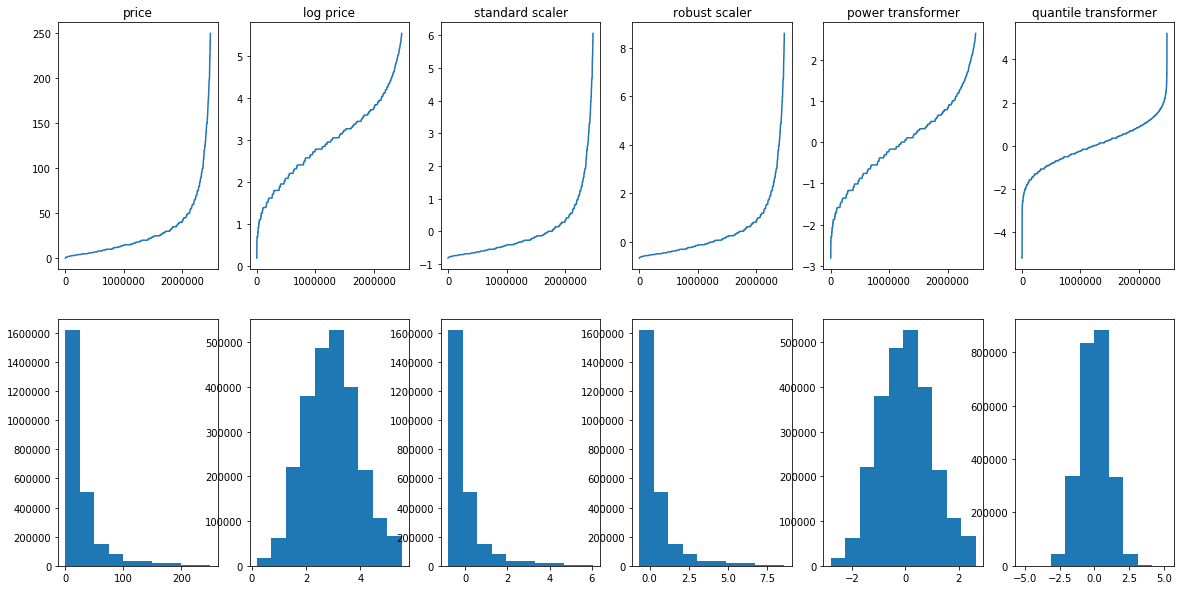

In [18]:
fig, ((ax0, ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(nrows=2, ncols=6, figsize = (20,10))

ax0.plot(sorted(price))
ax0.set_title('price')

ax6.hist(price)

ax1.plot(sorted(log_price))
ax1.set_title('log price')

ax7.hist(log_price)

ax2.plot(sorted(standard_price))
ax2.set_title('standard scaler')

ax8.hist(standard_price)

ax3.plot(sorted(robust_price))
ax3.set_title('robust scaler')

ax9.hist(robust_price)

ax4.plot(sorted(power_price))
ax4.set_title('power transformer')

ax10.hist(power_price)

ax5.plot(sorted(quantile_price))
ax5.set_title('quantile transformer')

ax11.hist(quantile_price)

plt.show()

In [19]:
print("Length of original dataset:", len(data))
print("Length of dataset with reduced price:", len(reduced_data))
print("Number of samples removed:", len(data)-len(reduced_data))
print("Percent of original dataset removed: ", (len(data)-len(reduced_data))/len(data)*100)

Length of original dataset: 2552460
Length of dataset with reduced price: 2478664
Number of samples removed: 73796
Percent of original dataset removed:  2.891171654012208


Only look at data with prices less than $200

In [20]:
reduced_data = data[data['price'] < 200]

In [21]:
price = np.array(reduced_data['price'].tolist())
standard_scaler = StandardScaler().fit(price.reshape(-1,1))
robust_scaler = RobustScaler().fit(price.reshape(-1,1))
power_transformer = PowerTransformer().fit(price.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))
log_price = np.log1p(price)
standard_price = standard_scaler.transform(price.reshape(-1,1))
robust_price = robust_scaler.transform(price.reshape(-1,1))
power_price = power_transformer.transform(price.reshape(-1,1))
quantile_price = quantile_transformer.transform(price.reshape(-1,1))

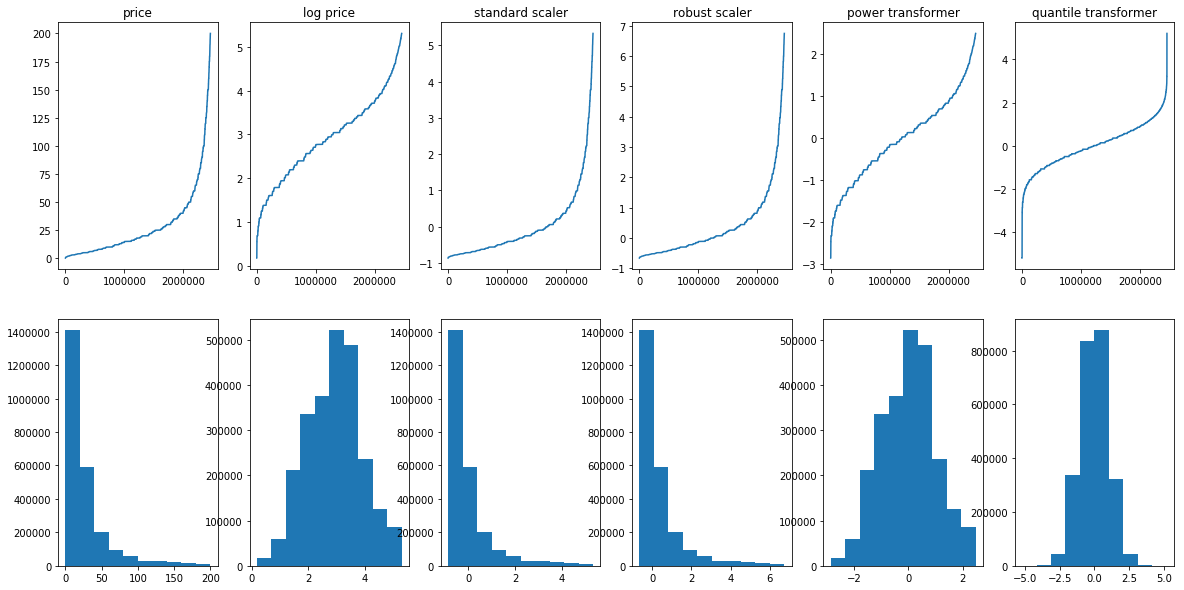

In [22]:
fig, ((ax0, ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(nrows=2, ncols=6, figsize = (20,10))

ax0.plot(sorted(price))
ax0.set_title('price')

ax6.hist(price)

ax1.plot(sorted(log_price))
ax1.set_title('log price')

ax7.hist(log_price)

ax2.plot(sorted(standard_price))
ax2.set_title('standard scaler')

ax8.hist(standard_price)

ax3.plot(sorted(robust_price))
ax3.set_title('robust scaler')

ax9.hist(robust_price)

ax4.plot(sorted(power_price))
ax4.set_title('power transformer')

ax10.hist(power_price)

ax5.plot(sorted(quantile_price))
ax5.set_title('quantile transformer')

ax11.hist(quantile_price)

plt.show()

In [23]:
print("Length of original dataset:", len(data))
print("Length of dataset with reduced price:", len(reduced_data))
print("Number of samples removed:", len(data)-len(reduced_data))
print("Percent of original dataset removed: ", (len(data)-len(reduced_data))/len(data)*100)

Length of original dataset: 2552460
Length of dataset with reduced price: 2459220
Number of samples removed: 93240
Percent of original dataset removed:  3.6529465691920735


Only look at data with prices less than $125

In [24]:
reduced_data = data[data['price'] < 125]

In [25]:
price = np.array(reduced_data['price'].tolist())
standard_scaler = StandardScaler().fit(price.reshape(-1,1))
robust_scaler = RobustScaler().fit(price.reshape(-1,1))
power_transformer = PowerTransformer().fit(price.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(price.reshape(-1,1))
log_price = np.log1p(price)
standard_price = standard_scaler.transform(price.reshape(-1,1))
robust_price = robust_scaler.transform(price.reshape(-1,1))
power_price = power_transformer.transform(price.reshape(-1,1))
quantile_price = quantile_transformer.transform(price.reshape(-1,1))

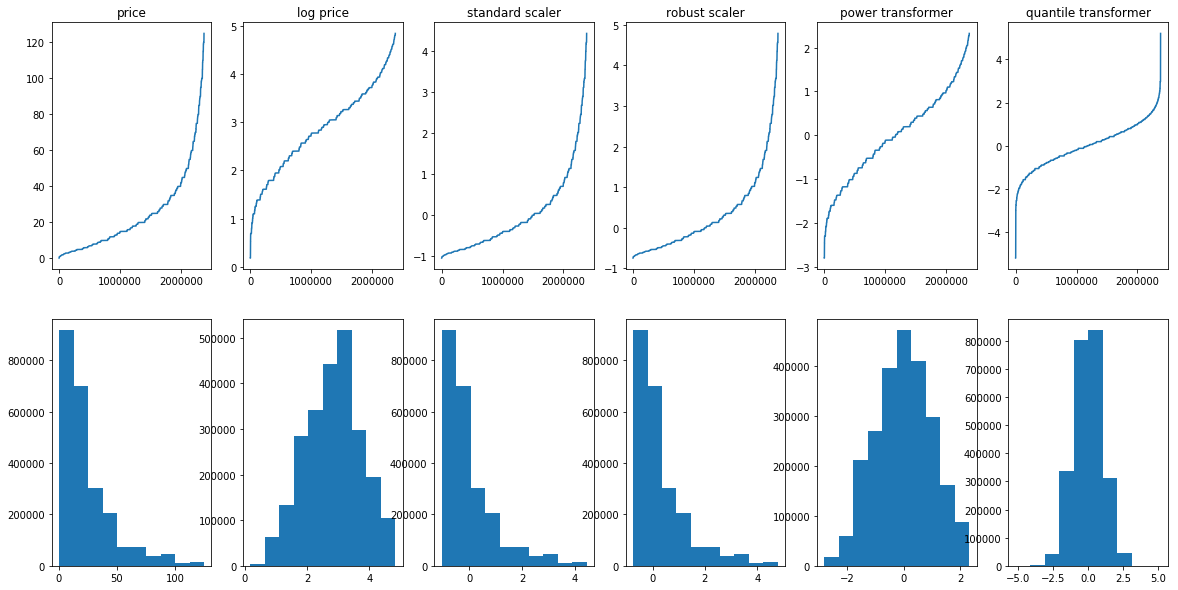

In [26]:
fig, ((ax0, ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(nrows=2, ncols=6, figsize = (20,10))

ax0.plot(sorted(price))
ax0.set_title('price')

ax6.hist(price)

ax1.plot(sorted(log_price))
ax1.set_title('log price')

ax7.hist(log_price)

ax2.plot(sorted(standard_price))
ax2.set_title('standard scaler')

ax8.hist(standard_price)

ax3.plot(sorted(robust_price))
ax3.set_title('robust scaler')

ax9.hist(robust_price)

ax4.plot(sorted(power_price))
ax4.set_title('power transformer')

ax10.hist(power_price)

ax5.plot(sorted(quantile_price))
ax5.set_title('quantile transformer')

ax11.hist(quantile_price)

plt.show()

In [27]:
print("Length of original dataset:", len(data))
print("Length of dataset with reduced price:", len(reduced_data))
print("Number of samples removed:", len(data)-len(reduced_data))
print("Percent of original dataset removed: ", (len(data)-len(reduced_data))/len(data)*100)

Length of original dataset: 2552460
Length of dataset with reduced price: 2381206
Number of samples removed: 171254
Percent of original dataset removed:  6.7093705680010665
